In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
excel_file_path = '/kaggle/input/10m-rows-fake-turkish-names-and-address-dataset/Customers_1M_Rows.xlsx'
try:
    data = pd.read_excel(excel_file_path, sheet_name='Customers')
    print("Veri başarıyla yüklendi.")
except FileNotFoundError:
    print(f"HATA'{excel_file_path}' bulunamadı.")
except ValueError:
    print(f"HATA: Lütfen sayfa adını kontrol edin.")

Veri başarıyla yüklendi.


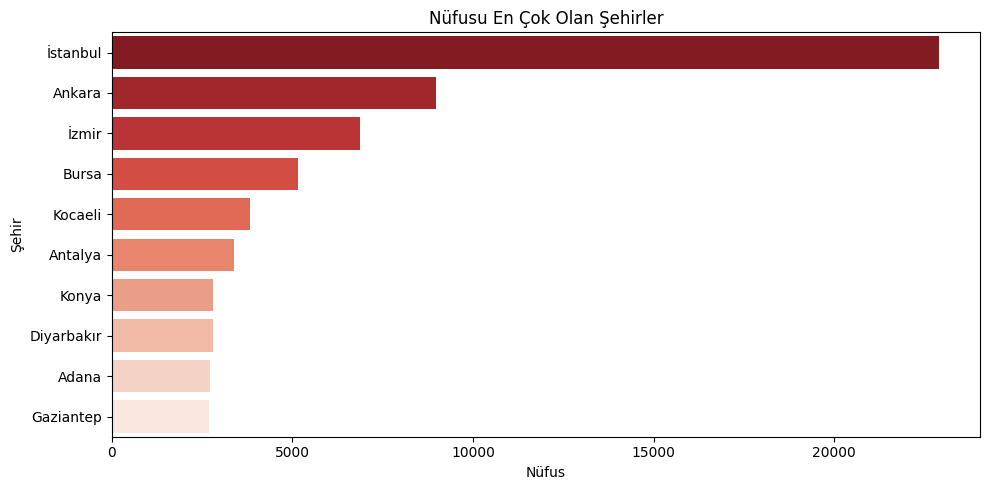

In [112]:
# Yatay Sütun Grafiği
plt.figure(figsize=(10, 5))
sns.barplot(y=top_cities.index, x=top_cities.values, palette="Reds_r") 

plt.title('Nüfusu En Çok Olan Şehirler', fontsize=12)
plt.xlabel('Nüfus')
plt.ylabel('Şehir')
plt.tight_layout()
plt.show()

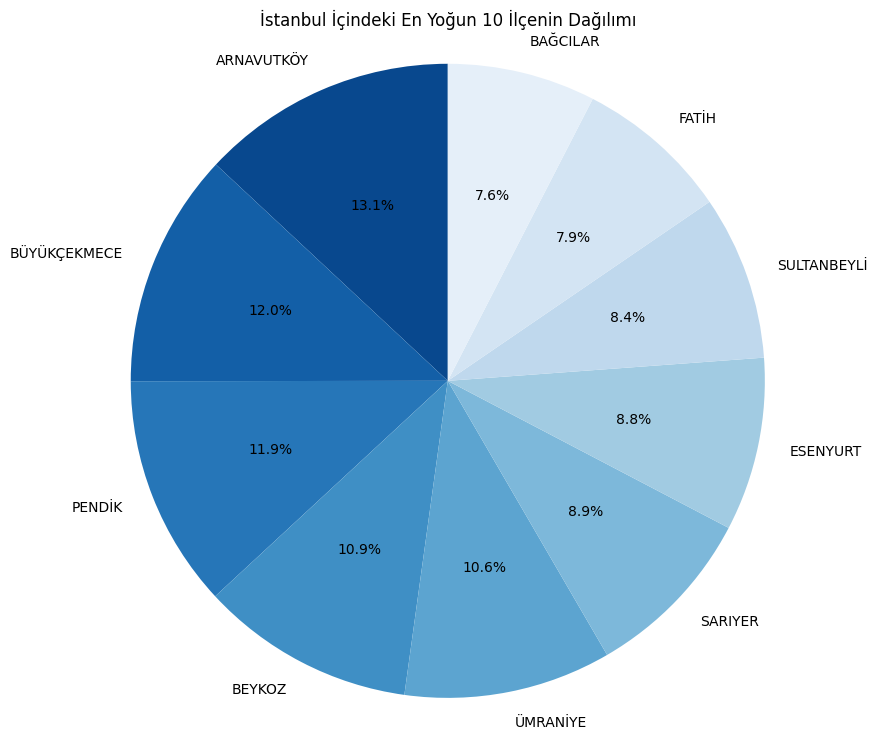

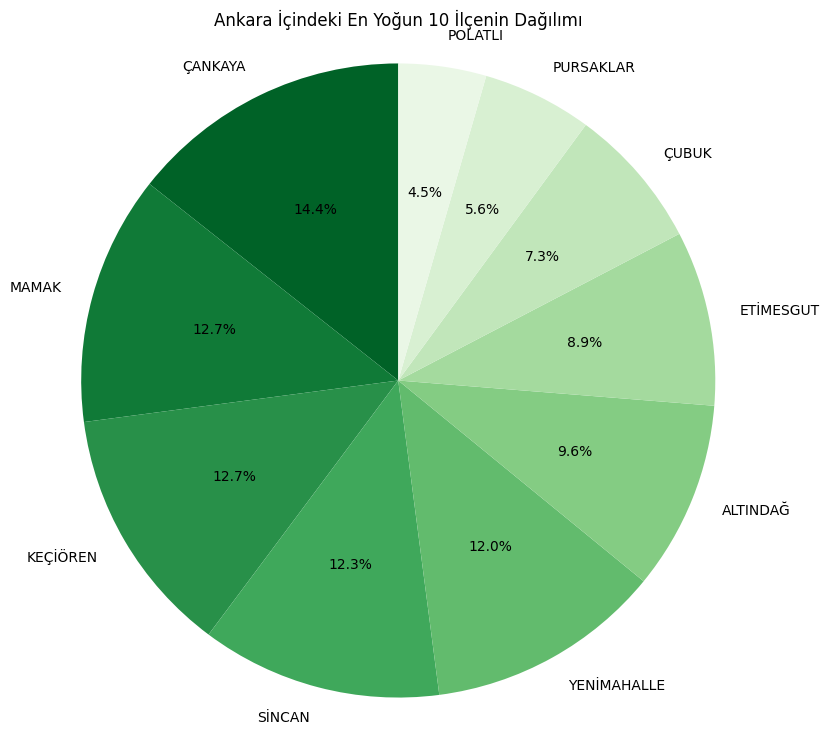

In [113]:
# İstanbul'daki kayıtlar
istanbul_data = data[data['CITY'] == 'İstanbul']

# İstanbul'daki ilçeler
istanbul_towns = istanbul_data['TOWN'].value_counts().head(10)

# Pasta Grafiği
plt.figure(figsize=(9, 9))
plt.pie(
    istanbul_towns.values, 
    labels=istanbul_towns.index, 
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Blues_r", len(istanbul_towns))
)
plt.title('İstanbul İçindeki En Yoğun 10 İlçenin Dağılımı', fontsize=12)
plt.axis('equal')
plt.show()

# Ankara'daki kayıtlar
ankara_data = data[data['CITY'] == 'Ankara']

# Ankara'daki ilçeler
ankara_towns = ankara_data['TOWN'].value_counts().head(10)

# Pasta Grafiği
plt.figure(figsize=(9, 9))
plt.pie(
    ankara_towns.values, 
    labels=ankara_towns.index, 
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Greens_r", len(ankara_towns))
)
plt.title('Ankara İçindeki En Yoğun 10 İlçenin Dağılımı', fontsize=12)
plt.axis('equal')
plt.show()

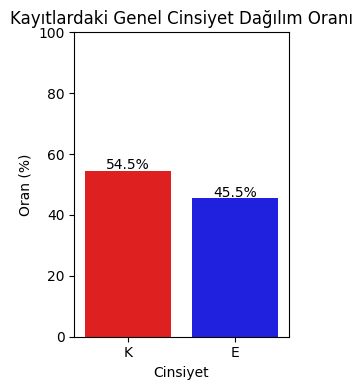

In [114]:
gender_counts_normalized = data['GENDER'].value_counts(normalize=True).mul(100).round(1)

# Sütun Grafiği
plt.figure(figsize=(3, 4))
sns.barplot(
    x='Cinsiyet', 
    y='Oran (%)', 
    data=gender_counts_df, 
    palette=['#FF0000','#0000FF']
)
for index, row in gender_counts_df.iterrows():
    plt.text(
        index,
        row['Oran (%)'] + 0.5,
        f"{row['Oran (%)']:.1f}%",
        color='black',
        ha="center",
        fontsize=10
    )

plt.title('Kayıtlardaki Genel Cinsiyet Dağılım Oranı', fontsize=12)
plt.xlabel('Cinsiyet')
plt.ylabel('Oran (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()